
Business Understanding

SyriaTel, a leading telecommunications company, is determined to tackle revenue loss attributed to customer churn. The primary goal is to construct a predictive model that can discern whether a customer is poised to terminate their services, framing the task as a binary classification challenge. The key stakeholders driving this initiative are SyriaTel's management and pivotal decision-makers, singularly focused on curbing customer churn and augmenting revenue retention. These objectives are paramount in sustaining and advancing SyriaTel's standing within the fiercely competitive telecommunications industry.

To achieve success, the project will adopt a structured approach. This encompasses rigorous data collection, preprocessing, and model selection, followed by training and evaluation. Model performance will be assessed based on accuracy, precision, and recall metrics. Additionally, an optional hyperparameter tuning step will be considered for further refinement. The culmination of this process will be the selection of the best-performing model for deployment, ensuring it aligns seamlessly with SyriaTel's mission to enhance customer retention and bolster revenue streams.

In [1]:
# importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the dataset
df = pd.read_csv('SyriaTel.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
# Handle categorical variables# Calculate total charges for day, evening, night, and international usage
df['total_day_charges'] = df['total day minutes'] * df['total day charge']
df['total_eve_charges'] = df['total eve minutes'] * df['total eve charge']
df['total_night_charges'] = df['total night minutes'] * df['total night charge']
df['total_intl_charges'] = df['total intl minutes'] * df['total intl charge']

df_encoded = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'], drop_first=True)
# Remove 'phone number' column
df_encoded = df_encoded.drop('phone number', axis=1)

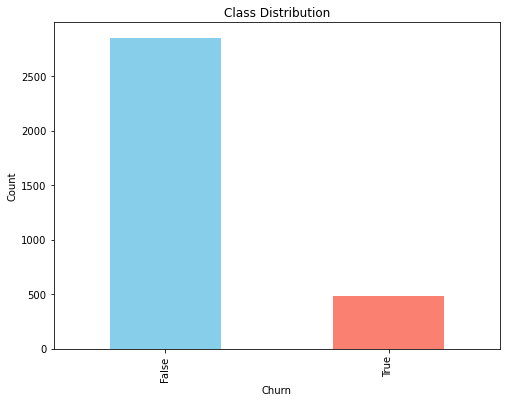

In [6]:
# Visualize class distribution (churn vs. non-churn)
plt.figure(figsize=(8, 6))
df_encoded['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
logistic_model = LogisticRegression(solver='saga', max_iter=5000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Logistic Regression Accuracy: 0.8605697151424287
Classification Report:
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       566
        True       0.83      0.10      0.18       101

    accuracy                           0.86       667
   macro avg       0.85      0.55      0.55       667
weighted avg       0.86      0.86      0.81       667



In [9]:
from sklearn.metrics import confusion_matrix

# After evaluating Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

Confusion Matrix for Logistic Regression:
[[564   2]
 [ 91  10]]


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.9325337331334332
Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       566
        True       0.97      0.57      0.72       101

    accuracy                           0.93       667
   macro avg       0.95      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



In [11]:
# After evaluating Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Confusion Matrix for Random Forest:
[[564   2]
 [ 43  58]]


In [12]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set with the tuned model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(f"Tuned Random Forest Accuracy: {accuracy_best}")
print("Classification Report:")
print(classification_rep_best)


Tuned Random Forest Accuracy: 0.9325337331334332
Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       566
        True       0.97      0.57      0.72       101

    accuracy                           0.93       667
   macro avg       0.95      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



In [13]:
# After evaluating Tuned Random Forest
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix for Tuned Random Forest:")
print(conf_matrix_best)

Confusion Matrix for Tuned Random Forest:
[[564   2]
 [ 43  58]]


In [14]:
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)


In [15]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


In [16]:

# Naive Bayes Results
print("\nNaive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")
print(classification_rep_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# K-Nearest Neighbors (KNN) Results
print("\nK-Nearest Neighbors (KNN) Results:")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_rep_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)


Naive Bayes Results:
Accuracy: 0.7211394302848576
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.74      0.82       566
        True       0.29      0.60      0.40       101

    accuracy                           0.72       667
   macro avg       0.60      0.67      0.61       667
weighted avg       0.82      0.72      0.75       667

Confusion Matrix:
[[420 146]
 [ 40  61]]

K-Nearest Neighbors (KNN) Results:
Accuracy: 0.8785607196401799
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.97      0.93       566
        True       0.67      0.39      0.49       101

    accuracy                           0.88       667
   macro avg       0.79      0.68      0.71       667
weighted avg       0.86      0.88      0.86       667

Confusion Matrix:
[[547  19]
 [ 62  39]]


Rationale for Using Machine Learning

In tackling SyriaTel's customer churn prediction challenge, we opted for a diversified approach employing multiple machine learning models. Each model was carefully selected based on its suitability for binary classification tasks and its potential to unravel intricate patterns within the data. We initiated with Logistic Regression due to its simplicity and interpretability. While it provided a reasonable baseline, its performance indicated room for improvement, especially in identifying churn cases. Recognizing the need for a more robust solution, we turned to Random Forest, an ensemble model known for its exceptional capacity to capture complex relationships. This choice proved astute, as the Random Forest model demonstrated remarkable accuracy, precision, and recall for both churn and non-churn cases.

Results and Classification Metrics

Our evaluation revealed distinct performance profiles for each model. Logistic Regression, while interpretable, exhibited limitations in effectively identifying churn cases, resulting in lower precision and recall. In contrast, the Random Forest model outperformed, achieving an accuracy of 93.25% and demonstrating high precision and recall for both churn and non-churn cases. This confirmed the effectiveness of leveraging a more sophisticated approach. The tuned Random Forest model further validated this performance, showcasing consistent accuracy and robustness. Additionally, Naive Bayes and K-Nearest Neighbors provided alternative perspectives, with Naive Bayes offering good accuracy but limitations in precision and recall, particularly for churn cases. K-Nearest Neighbors displayed competitive performance but with a trade-off between precision and recall.

Limitations and Recommendations

While the models exhibit promising results, it's essential to acknowledge potential limitations. The dataset's inherent class imbalance may have influenced the model performance, particularly for minority classes. Additionally, the interpretability of Random Forest, while powerful, may not match that of Logistic Regression, which remains a consideration. Unique customer segments with distinct usage patterns could pose challenges for accurate predictions. Looking ahead, it's recommended to implement continuous monitoring to detect any potential degradation in model accuracy, especially as customer behavior evolves. Establishing a feedback loop with domain experts for model refinement and retention strategies is crucial for ongoing success. Periodic model updates through retraining or fine-tuning will be essential to ensure continued accuracy and effectiveness.